In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.neighbors import LocalOutlierFactor
import warnings


In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv("train.csv")

In [4]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [7]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Colunas categóricas: {categorical_columns}")

Colunas categóricas: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns
print(f"Colunas numéricas: {numerical_columns}")

Colunas numéricas: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


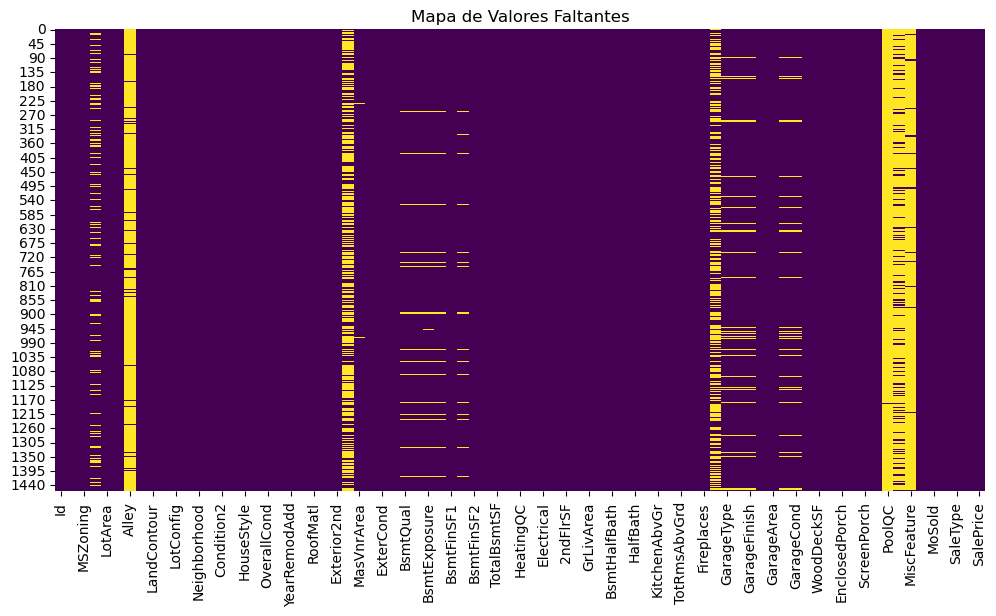

In [10]:
# Plotar valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.show()

In [11]:
# Exibir colunas com valores faltantes e suas proporções
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(df)) * 100
print(missing_values_percentage)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


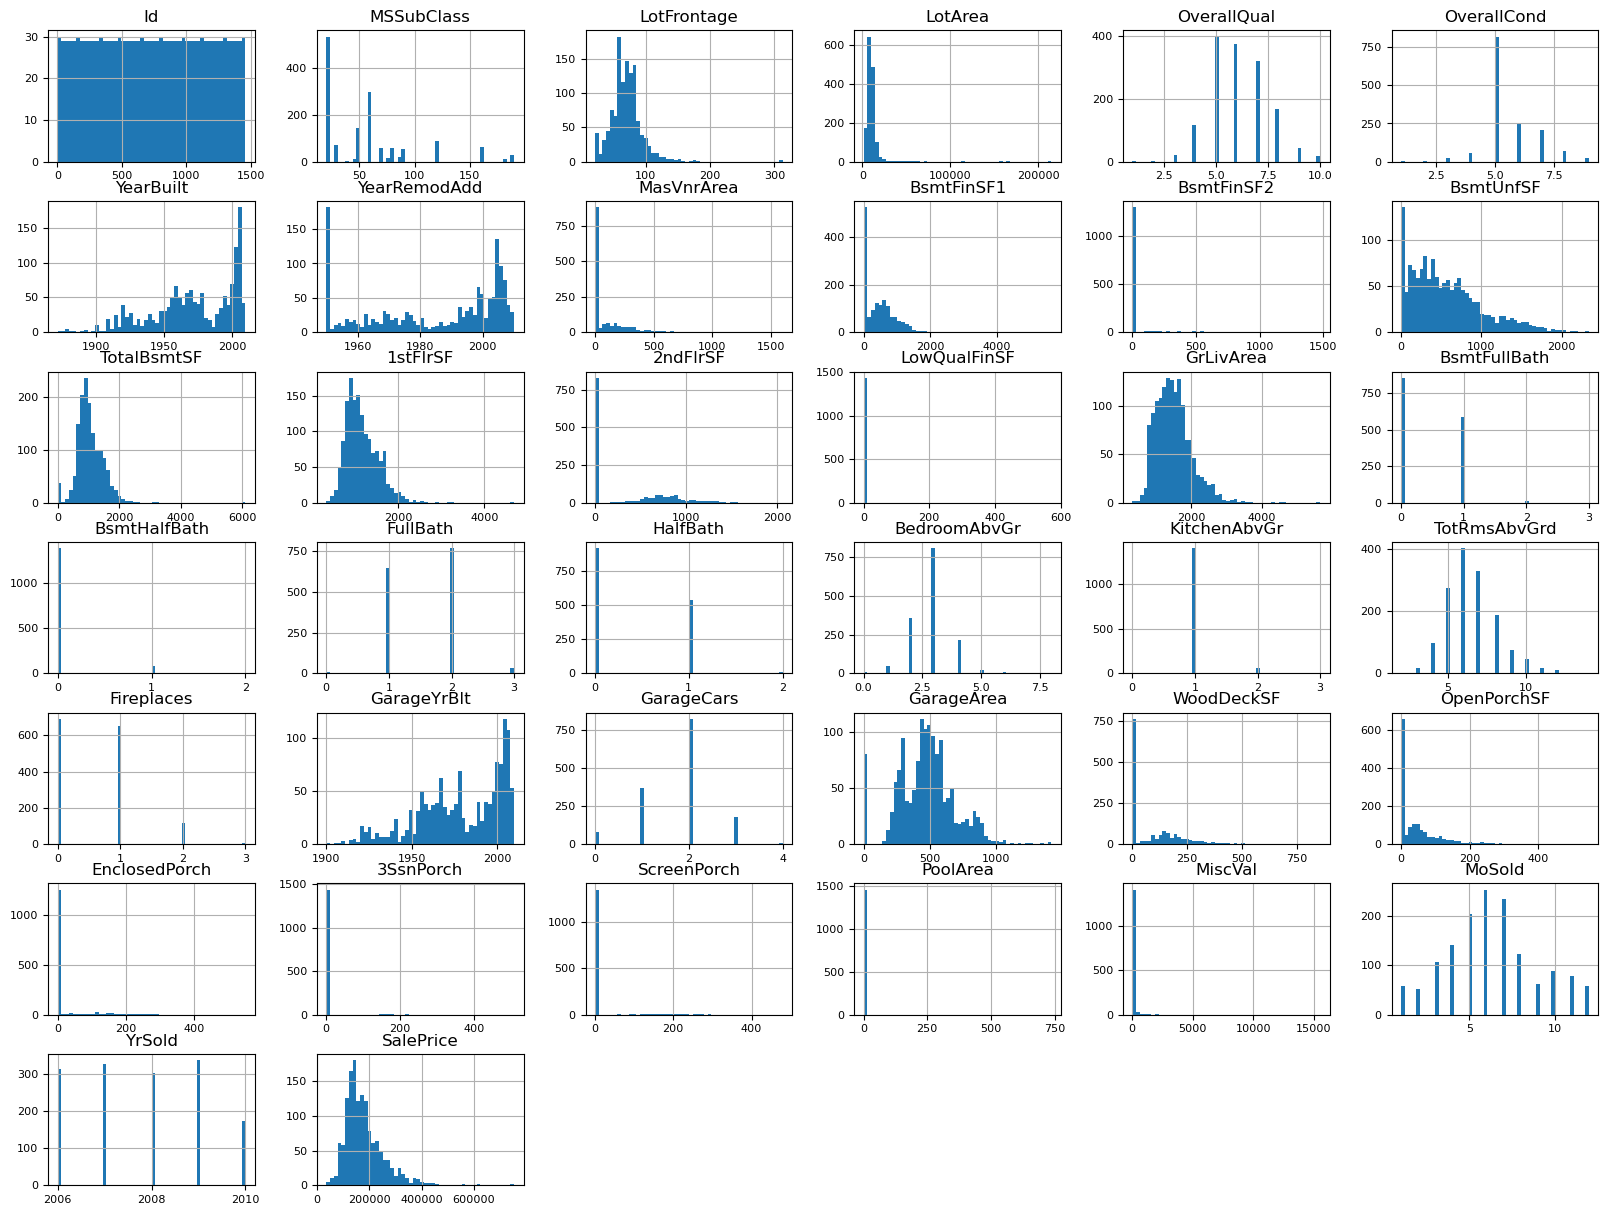

In [12]:
# Plotar histogramas para variáveis numéricas
df[numerical_columns].hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

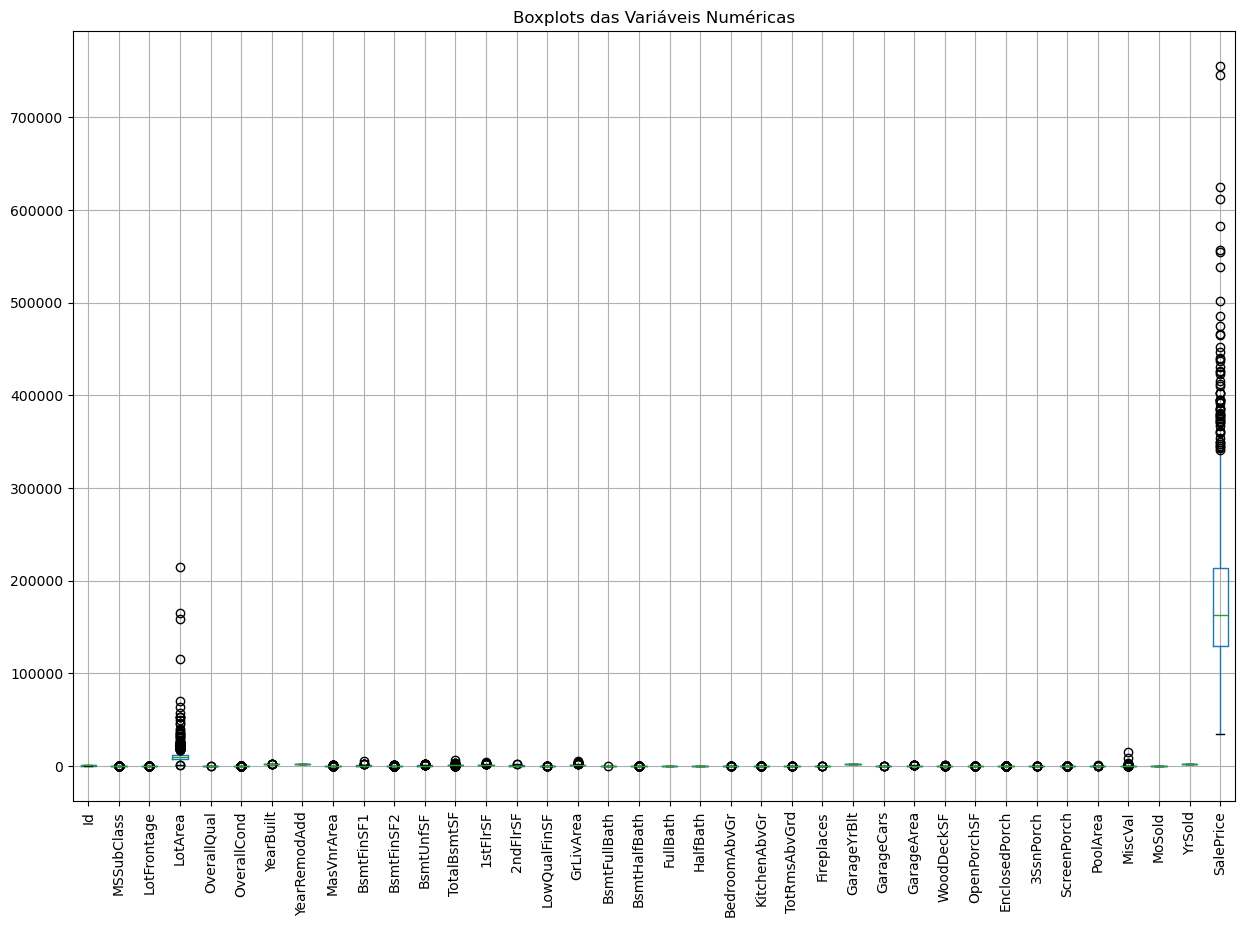

In [13]:
# Plotar boxplots para variáveis numéricas
plt.figure(figsize=(15, 10))
df[numerical_columns].boxplot(rot=90)
plt.title('Boxplots das Variáveis Numéricas')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


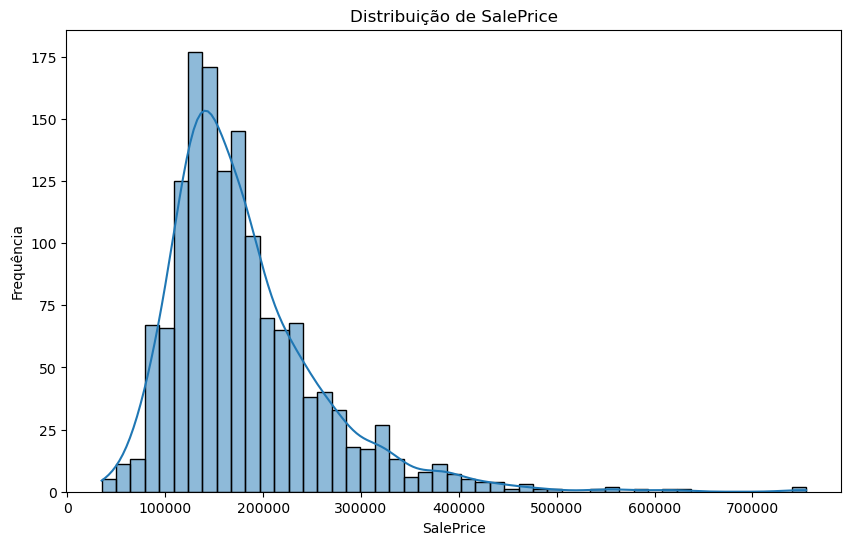

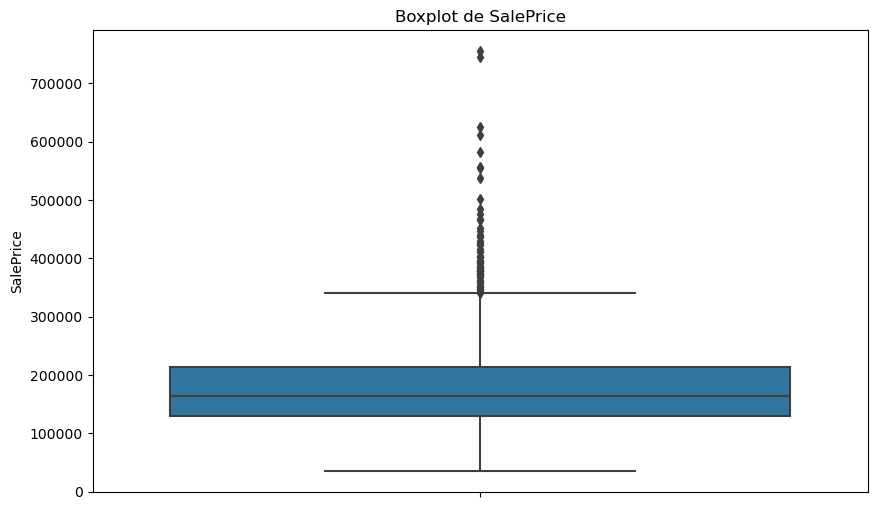

In [14]:
# Histograma e Boxplot de SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribuição de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y='SalePrice', data=df)
plt.title('Boxplot de SalePrice')
plt.ylabel('SalePrice')
plt.show()

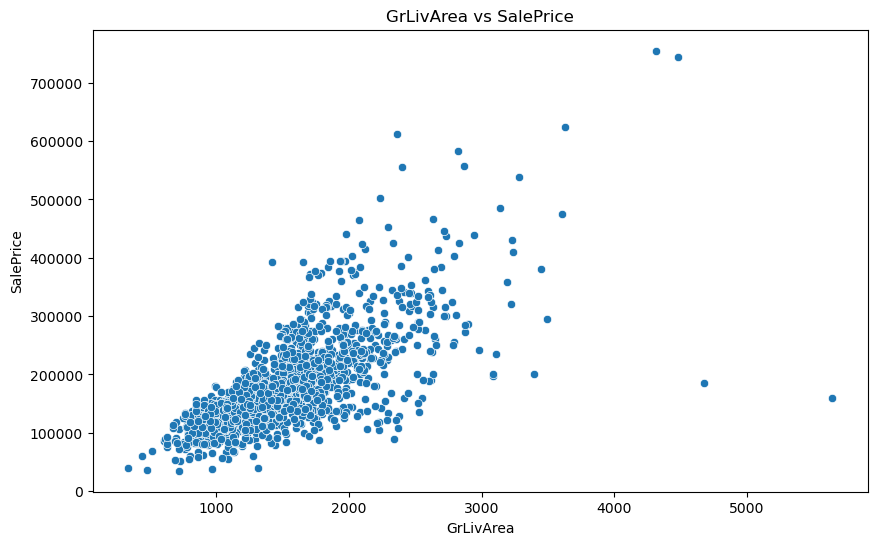

In [15]:
# Gráfico de dispersão de GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


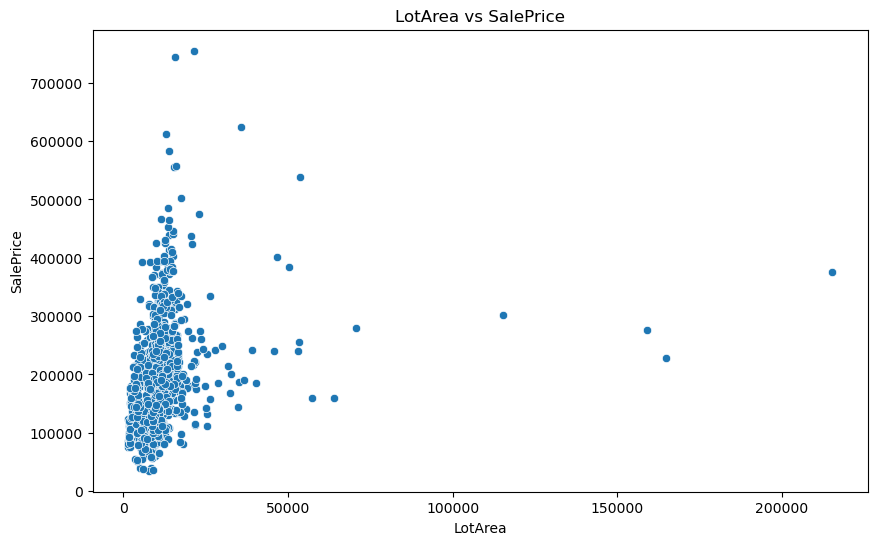

In [16]:
# Gráfico de dispersão de GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

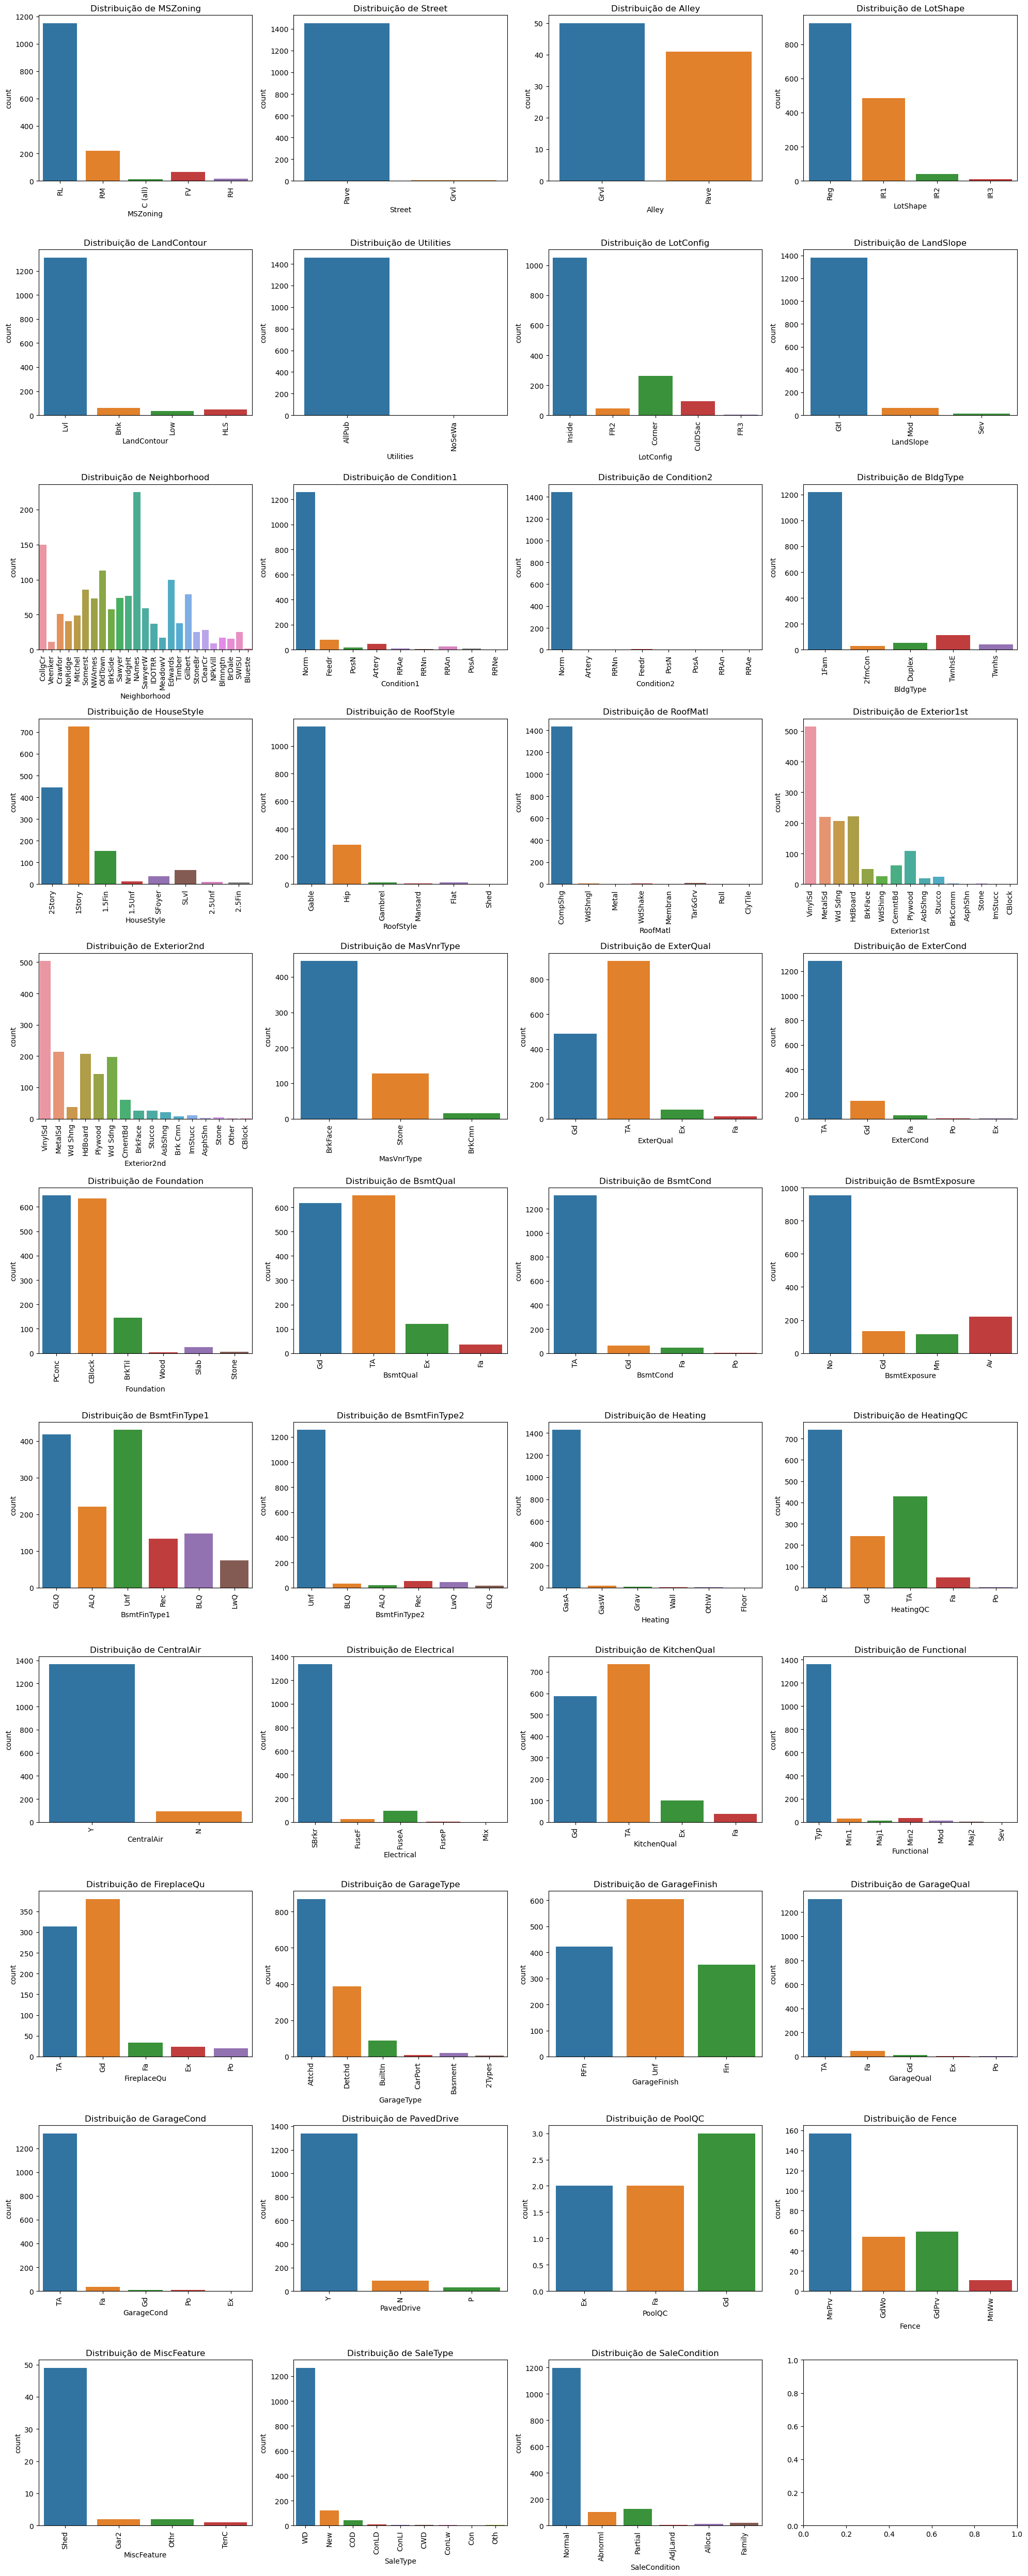

In [17]:
# Plotar gráficos de barras para variáveis categóricas
fig, axs = plt.subplots(nrows=11, ncols=4, figsize=(20, 50))
axs = axs.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axs[i])
    axs[i].set_title(f'Distribuição de {col}')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [18]:
# Remover colunas com muitos valores faltantes
df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [19]:
# Preencher valores faltantes para colunas numéricas com a média
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)

In [20]:
# Preencher valores faltantes para colunas categóricas com a moda
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)

In [21]:
# Verificar se ainda existem valores faltantes
print(df.isnull().sum().sum()) 

0


In [22]:
# Convertendo MSSubClass em uma coluna categórica
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [23]:
# Selecionando colunas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [24]:
# Normalizando colunas numéricas
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [25]:
# Aplicando one-hot encoding às variáveis categóricas
df = pd.get_dummies(df)

In [26]:
correlation_matrix = df.corr()

In [27]:
# Selecionando as features com as maiores correlações com SalePrice
top_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(10).index.tolist()

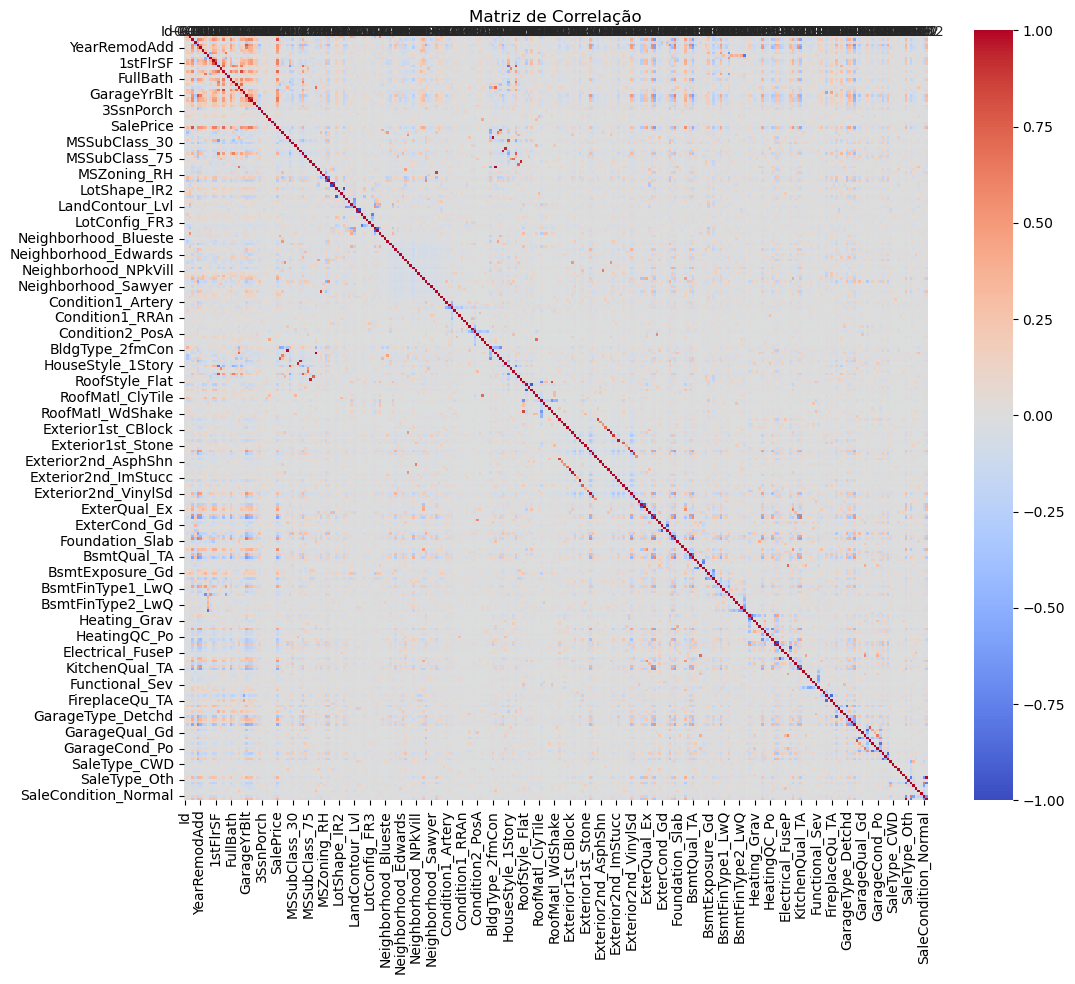

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [29]:
# Separando as features e o target
X = df.drop(columns=['SalePrice'])  # Features
y = df['SalePrice']  # Target

In [30]:
# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error (MSE): 5203322100557292544.00
Root Mean Squared Error (RMSE): 2281079152.63
R^2 Score: -4278338566479939072.00


In [35]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [39]:
y_pred = knn.predict(X_test_scaled)

In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R^2 Score: {:.2f}".format(r2))

Mean Squared Error (MSE): 0.29
Root Mean Squared Error (RMSE): 0.54
R^2 Score: 0.76


In [41]:
print("Um RMSE de 0.54 indica que, em média, as previsões do modelo estão desviando em torno de 0.54 unidades da variável alvo. E um R² de 0.76 indica que o modelo explica cerca de 76% da variabilidade dos dados, o que é bastante decente.")

Um RMSE de 0.54 indica que, em média, as previsões do modelo estão desviando em torno de 0.54 unidades da variável alvo. E um R² de 0.76 indica que o modelo explica cerca de 76% da variabilidade dos dados, o que é bastante decente.


In [42]:
# Remover coluna 'Id' e 'SalePrice' para evitar vazamento de dados
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

In [43]:
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X, y)

SelectFromModel(estimator=RandomForestRegressor(random_state=42))

In [44]:
selected_features = X.columns[selector.get_support()]
print("Variáveis Selecionadas:")
print(selected_features)

Variáveis Selecionadas:
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'GarageFinish_Unf'],
      dtype='object')


In [45]:
X_regression = df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                   'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                   '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
                   'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [46]:
y_regression = df['SalePrice']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

In [48]:
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred_regression = model_regression.predict(X_test)

In [50]:
mse_regression = mean_squared_error(y_test, y_pred_regression)
print("Erro Médio Quadrático (MSE) da Regressão Linear:", mse_regression)

Erro Médio Quadrático (MSE) da Regressão Linear: 0.2230696600285789


In [51]:
df['SalePriceCategory'] = np.where(df['SalePrice'] > df['SalePrice'].median(), 1, 0)

In [52]:
# Separar features e target
X = df.drop(columns=['SalePrice', 'SalePriceCategory'])
y = df['SalePriceCategory']

In [53]:
# Converter variáveis categóricas para numéricas
X = pd.get_dummies(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = clf.predict(X_test)

In [57]:
# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo de classificação: {accuracy}')

Acurácia do modelo de classificação: 0.952054794520548


In [58]:
print("Interpretação: A acurácia é a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. Uma acurácia de aproximadamente 95,2% indica que o modelo classificou corretamente 95,2% das casas como sendo vendidas por um preço alto ou baixo.")

Interpretação: A acurácia é a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. Uma acurácia de aproximadamente 95,2% indica que o modelo classificou corretamente 95,2% das casas como sendo vendidas por um preço alto ou baixo.


In [59]:
# Relatório de classificação
report = classification_report(y_test, y_pred)
print('Relatório de classificação:')
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       161
           1       0.93      0.96      0.95       131

    accuracy                           0.95       292
   macro avg       0.95      0.95      0.95       292
weighted avg       0.95      0.95      0.95       292



In [60]:
print("""
Precision (Precisão)

Definição: Proporção de verdadeiros positivos sobre o total de previsões positivas feitas pelo modelo. 

- Para a classe `0` (preço baixo), a precisão é 0.95.
- Para a classe `1` (preço alto), a precisão é 0.96.

Interpretação: 
- De todas as casas que o modelo previu como tendo um preço baixo, 95% realmente têm preço baixo.
- De todas as casas que o modelo previu como tendo um preço alto, 96% realmente têm preço alto.

Recall (Revocação)

**Definição**: Proporção de verdadeiros positivos sobre o total de verdadeiros positivos existentes na classe.

- Para a classe `0`, o recall é 0.96.
- Para a classe `1`, o recall é 0.95.

**Interpretação**: 
- De todas as casas que realmente têm preço baixo, o modelo identificou corretamente 96%.
- De todas as casas que realmente têm preço alto, o modelo identificou corretamente 95%.

F1-Score

Definição: Média harmônica entre precisão e recall.

- Um valor de 0.96 para ambas as classes indica um bom equilíbrio entre precisão e recall.

Interpretação: 
- O F1-Score de 0.96 para ambas as classes mostra que o modelo tem um desempenho muito bom tanto em identificar verdadeiros positivos quanto em evitar falsos positivos.

Support

Definição: Número de ocorrências reais de cada classe no conjunto de teste. 

- Ambas as classes têm 146 ocorrências, indicando um conjunto de teste balanceado.
""")



Precision (Precisão)

Definição: Proporção de verdadeiros positivos sobre o total de previsões positivas feitas pelo modelo. 

- Para a classe `0` (preço baixo), a precisão é 0.95.
- Para a classe `1` (preço alto), a precisão é 0.96.

Interpretação: 
- De todas as casas que o modelo previu como tendo um preço baixo, 95% realmente têm preço baixo.
- De todas as casas que o modelo previu como tendo um preço alto, 96% realmente têm preço alto.

Recall (Revocação)

**Definição**: Proporção de verdadeiros positivos sobre o total de verdadeiros positivos existentes na classe.

- Para a classe `0`, o recall é 0.96.
- Para a classe `1`, o recall é 0.95.

**Interpretação**: 
- De todas as casas que realmente têm preço baixo, o modelo identificou corretamente 96%.
- De todas as casas que realmente têm preço alto, o modelo identificou corretamente 95%.

F1-Score

Definição: Média harmônica entre precisão e recall.

- Um valor de 0.96 para ambas as classes indica um bom equilíbrio entre precisão 

In [61]:
scores = cross_val_score(clf, X, y, cv=5)
print(f'Validação Cruzada - Acurácia Média: {scores.mean()}')

Validação Cruzada - Acurácia Média: 0.9219178082191781


In [62]:
print("""
Interpretação

A validação cruzada é uma técnica para avaliar a robustez e a generalização do modelo. 

- Uma acurácia média de 92,7% indica que o modelo tem um desempenho consistente em diferentes subconjuntos do conjunto de dados, o que reforça a confiabilidade dos resultados.

Conclusão

- O modelo de classificação desenvolvido tem uma acurácia muito alta, tanto no conjunto de teste quanto na validação cruzada, indicando que ele é eficaz em prever se uma casa será vendida por um preço alto ou baixo.
- As métricas de precisão, recall e F1-Score também são muito altas para ambas as classes, sugerindo que o modelo consegue balancear bem entre a identificação correta de casas de preços altos e baixos e evitar erros de classificação.
""")



Interpretação

A validação cruzada é uma técnica para avaliar a robustez e a generalização do modelo. 

- Uma acurácia média de 92,7% indica que o modelo tem um desempenho consistente em diferentes subconjuntos do conjunto de dados, o que reforça a confiabilidade dos resultados.

Conclusão

- O modelo de classificação desenvolvido tem uma acurácia muito alta, tanto no conjunto de teste quanto na validação cruzada, indicando que ele é eficaz em prever se uma casa será vendida por um preço alto ou baixo.
- As métricas de precisão, recall e F1-Score também são muito altas para ambas as classes, sugerindo que o modelo consegue balancear bem entre a identificação correta de casas de preços altos e baixos e evitar erros de classificação.



In [63]:
# Selecionando algumas variáveis numéricas para a clusterização
cluster_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                    'YearRemodAdd', 'GrLivArea', 'GarageArea']

In [64]:
# Criando um novo DataFrame com as variáveis selecionadas
df_cluster = df[cluster_features].dropna()

In [65]:
# Normalizando os dados
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
D:\A

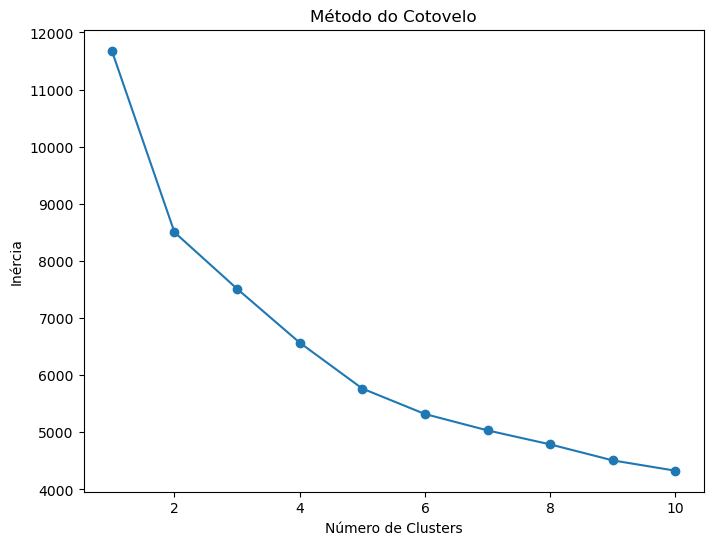

In [66]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [67]:
# Aplicando K-Means com o número escolhido de clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


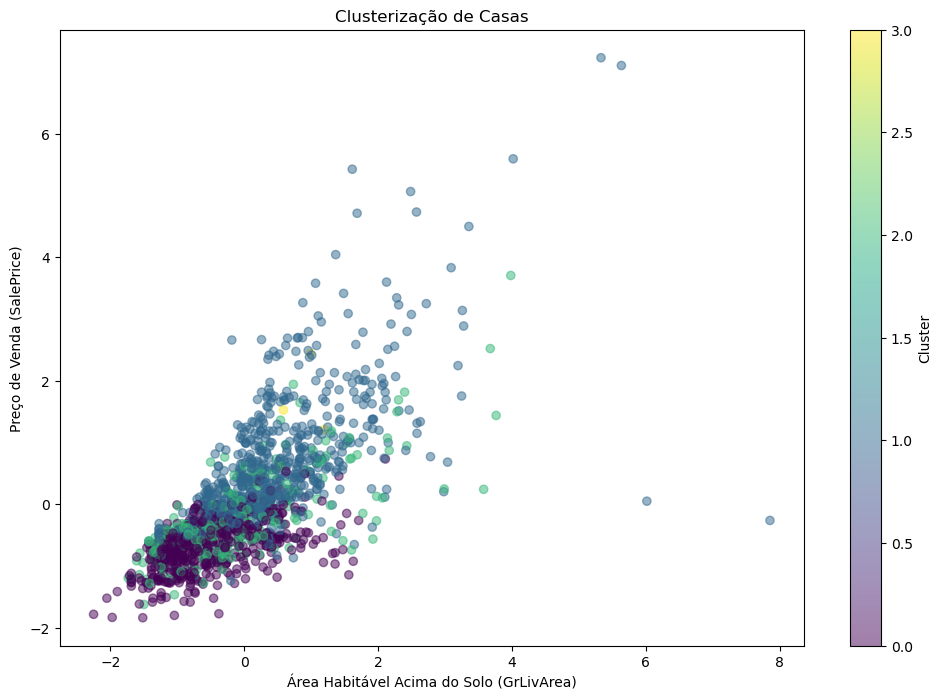

In [68]:
df['Cluster'] = -1
df.loc[df_cluster.index, 'Cluster'] = df_cluster['Cluster']

# Visualizando a distribuição dos clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['GrLivArea'], df['SalePrice'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Área Habitável Acima do Solo (GrLivArea)')
plt.ylabel('Preço de Venda (SalePrice)')
plt.title('Clusterização de Casas')
plt.colorbar(label='Cluster')
plt.show()

In [69]:
# Analisando as características médias de cada cluster
cluster_analysis = df.groupby('Cluster')[cluster_features + ['SalePrice']].mean()
print(cluster_analysis)

         LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
Cluster                                                                
0          -0.155207  -0.116782    -0.736755    -0.266486  -0.576359   
1           0.182604   0.027708     0.801407    -0.431857   0.886333   
2          -0.123472  -0.054481    -0.377754     1.496560  -0.878794   
3           0.907843  15.333637     0.108993     0.157007  -0.215875   

         YearRemodAdd  GrLivArea  GarageArea  SalePrice  
Cluster                                                  
0           -1.060717  -0.505667   -0.485185  -0.668784  
1            0.718664   0.506576    0.593630   0.691565  
2            0.444323  -0.171531   -0.401610  -0.280877  
3           -0.017722   0.822456    0.325267   1.445771  


In [70]:
print("""
Cluster 0: Tem valores relativamente baixos em LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, GrLivArea, GarageArea e SalePrice.

Cluster 1: Apresenta valores médios a altos em todas as variáveis, com exceção de LotFrontage e LotArea, que têm valores ligeiramente acima da média.

Cluster 2: Tem valores abaixo da média em OverallQual, YearBuilt, YearRemodAdd, GrLivArea, GarageArea e SalePrice, mas com valores intermediários em LotFrontage e LotArea.

Cluster 3: Possui valores muito altos em LotArea e SalePrice, e valores acima da média em YearRemodAdd, GrLivArea e GarageArea.
""")


Cluster 0: Tem valores relativamente baixos em LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, GrLivArea, GarageArea e SalePrice.

Cluster 1: Apresenta valores médios a altos em todas as variáveis, com exceção de LotFrontage e LotArea, que têm valores ligeiramente acima da média.

Cluster 2: Tem valores abaixo da média em OverallQual, YearBuilt, YearRemodAdd, GrLivArea, GarageArea e SalePrice, mas com valores intermediários em LotFrontage e LotArea.

Cluster 3: Possui valores muito altos em LotArea e SalePrice, e valores acima da média em YearRemodAdd, GrLivArea e GarageArea.



In [71]:
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df)

In [72]:
pca = PCA(n_components=2)  # Reduzindo para 2 dimensões para visualização


In [73]:
dados_pca = pca.fit_transform(dados_normalizados)

In [74]:
dados_pca_df = pd.DataFrame(data=dados_pca, columns=['Componente 1', 'Componente 2'])

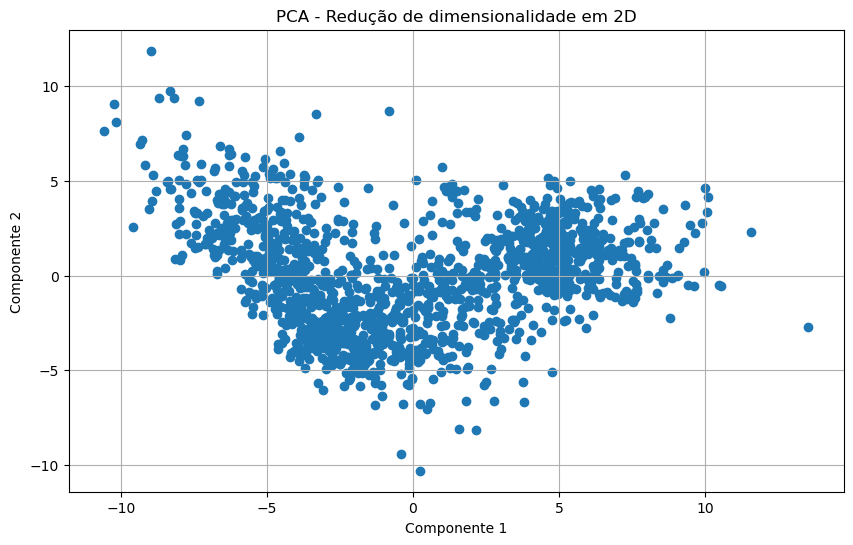

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(dados_pca_df['Componente 1'], dados_pca_df['Componente 2'])
plt.title('PCA - Redução de dimensionalidade em 2D')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()

In [76]:
data = {
    'LotFrontage': [65, 80, 68, 60, 84],
    'LotArea': [8450, 9600, 11250, 9550, 14260],
    'OverallQual': [7, 6, 7, 7, 8],
    'OverallCond': [5, 8, 5, 5, 5],
    'YearBuilt': [2003, 1976, 2001, 1915, 2000],
    'YearRemodAdd': [2003, 1976, 2002, 1970, 2000],
    'GrLivArea': [1710, 1262, 1786, 1717, 2198],
    'GarageArea': [548, 460, 608, 642, 836],
    'SalePrice': [208500, 181500, 223500, 140000, 250000]
}

df = pd.DataFrame(data)

In [77]:
print(df)

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0           65     8450            7            5       2003          2003   
1           80     9600            6            8       1976          1976   
2           68    11250            7            5       2001          2002   
3           60     9550            7            5       1915          1970   
4           84    14260            8            5       2000          2000   

   GrLivArea  GarageArea  SalePrice  
0       1710         548     208500  
1       1262         460     181500  
2       1786         608     223500  
3       1717         642     140000  
4       2198         836     250000  


In [78]:
df['LotFrontage'] = pd.cut(df['LotFrontage'], bins=[0, 50, 75, 100, float('inf')], labels=['0-50', '51-75', '76-100', '101+'])
df['LotArea'] = pd.cut(df['LotArea'], bins=[0, 5000, 10000, 15000, float('inf')], labels=['0-5000', '5001-10000', '10001-15000', '15001+'])
df['YearBuilt'] = pd.cut(df['YearBuilt'], bins=[1800, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], labels=['1800-1900', '1901-1910', '1911-1920', '1921-1930', '1931-1940', '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010'])
df['YearRemodAdd'] = pd.cut(df['YearRemodAdd'], bins=[1950, 1960, 1970, 1980, 1990, 2000, 2010], labels=['1950-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010'])
df['GrLivArea'] = pd.cut(df['GrLivArea'], bins=[0, 1000, 1500, 2000, 2500, float('inf')], labels=['0-1000', '1001-1500', '1501-2000', '2001-2500', '2501+'])
df['GarageArea'] = pd.cut(df['GarageArea'], bins=[0, 500, 1000, 1500, float('inf')], labels=['0-500', '501-1000', '1001-1500', '1501+'])

In [79]:
threshold_price = 200000
data['SalePrice'] = df['SalePrice'].apply(lambda x: 1 if x >= threshold_price else 0)

In [80]:
print(df)

  LotFrontage      LotArea  OverallQual  OverallCond  YearBuilt YearRemodAdd  \
0       51-75   5001-10000            7            5  2001-2010    2001-2010   
1      76-100   5001-10000            6            8  1971-1980    1971-1980   
2       51-75  10001-15000            7            5  2001-2010    2001-2010   
3       51-75   5001-10000            7            5  1911-1920    1961-1970   
4      76-100  10001-15000            8            5  1991-2000    1991-2000   

   GrLivArea GarageArea  SalePrice  
0  1501-2000   501-1000     208500  
1  1001-1500      0-500     181500  
2  1501-2000   501-1000     223500  
3  1501-2000   501-1000     140000  
4  2001-2500   501-1000     250000  


In [81]:
df_encoded = pd.get_dummies(df)

In [82]:
for column in df_encoded.columns:
    print(column, df_encoded[column].unique())

OverallQual [7 6 8]
OverallCond [5 8]
SalePrice [208500 181500 223500 140000 250000]
LotFrontage_0-50 [False]
LotFrontage_51-75 [ True False]
LotFrontage_76-100 [False  True]
LotFrontage_101+ [False]
LotArea_0-5000 [False]
LotArea_5001-10000 [ True False]
LotArea_10001-15000 [False  True]
LotArea_15001+ [False]
YearBuilt_1800-1900 [False]
YearBuilt_1901-1910 [False]
YearBuilt_1911-1920 [False  True]
YearBuilt_1921-1930 [False]
YearBuilt_1931-1940 [False]
YearBuilt_1941-1950 [False]
YearBuilt_1951-1960 [False]
YearBuilt_1961-1970 [False]
YearBuilt_1971-1980 [False  True]
YearBuilt_1981-1990 [False]
YearBuilt_1991-2000 [False  True]
YearBuilt_2001-2010 [ True False]
YearRemodAdd_1950-1960 [False]
YearRemodAdd_1961-1970 [False  True]
YearRemodAdd_1971-1980 [False  True]
YearRemodAdd_1981-1990 [False]
YearRemodAdd_1991-2000 [False  True]
YearRemodAdd_2001-2010 [ True False]
GrLivArea_0-1000 [False]
GrLivArea_1001-1500 [False  True]
GrLivArea_1501-2000 [ True False]
GrLivArea_2001-2500 [Fal

In [83]:
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'bool':
        continue
    # Substituindo os valores diferentes de zero por True e os outros por False
    df_encoded[column] = df_encoded[column].apply(lambda x: True if x != 0 else False)

In [84]:
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

In [85]:
print(frequent_itemsets)

      support                                           itemsets
0         1.0                                      (OverallQual)
1         1.0                                      (OverallCond)
2         1.0                                        (SalePrice)
3         0.6                                (LotFrontage_51-75)
4         0.4                               (LotFrontage_76-100)
...       ...                                                ...
2114      0.2  (GrLivArea_1501-2000, OverallQual, YearRemodAd...
2115      0.2  (GrLivArea_1501-2000, OverallQual, LotArea_500...
2116      0.2  (LotArea_10001-15000, GrLivArea_1501-2000, Ove...
2117      0.2  (GrLivArea_1001-1500, YearBuilt_1971-1980, Ove...
2118      0.2  (LotArea_10001-15000, YearBuilt_1991-2000, Ove...

[2119 rows x 2 columns]


In [86]:
print("Associações mais frequentes: As associações mais frequentes são aquelas com suporte igual a 1.0, o que significa que essas características ocorrem em todas as instâncias do conjunto de dados. Isso inclui características como 'OverallQual' e 'OverallCond'.\n")
print("Associações menos frequentes: Há uma variedade de associações com diferentes níveis de suporte, algumas das quais podem ser menos comuns. Por exemplo, associações envolvendo faixas específicas de 'LotFrontage' e 'LotArea' têm suportes variados, o que indica que essas características podem ter diferentes graus de influência nas características das casas.\n")
print("Associações interessantes: Podemos observar associações que envolvem múltiplas características, como combinações de 'OverallCond', 'YearBuilt', e 'LotArea'. Essas associações podem indicar padrões interessantes sobre como diferentes características das casas estão relacionadas entre si.")

Associações mais frequentes: As associações mais frequentes são aquelas com suporte igual a 1.0, o que significa que essas características ocorrem em todas as instâncias do conjunto de dados. Isso inclui características como 'OverallQual' e 'OverallCond'.

Associações menos frequentes: Há uma variedade de associações com diferentes níveis de suporte, algumas das quais podem ser menos comuns. Por exemplo, associações envolvendo faixas específicas de 'LotFrontage' e 'LotArea' têm suportes variados, o que indica que essas características podem ter diferentes graus de influência nas características das casas.

Associações interessantes: Podemos observar associações que envolvem múltiplas características, como combinações de 'OverallCond', 'YearBuilt', e 'LotArea'. Essas associações podem indicar padrões interessantes sobre como diferentes características das casas estão relacionadas entre si.


In [93]:
n_neighbors = min(20, len(df_encoded) - 1)

In [94]:
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination='auto')

In [95]:
outlier_scores = lof.fit_predict(df_encoded)

In [96]:
outlier_indices = np.where(outlier_scores == -1)[0]
print("Índices das instâncias consideradas outliers:", outlier_indices)

Índices das instâncias consideradas outliers: []
